# Analysis of Netflix Data

## Data Wrangling

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

### Load data 


In [2]:
df = pd.read_csv("netflix_titles.csv").set_index("show_id")

### Explore data

In [3]:
print(df.shape)
df.head()

(8807, 11)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


## Data Cleaning

In [5]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

'rating' is cleaned by removing values that are not ratings and replacing with NaN

In [6]:
df["rating"].replace(["74 min", "84 min", "66 min"], np.nan, inplace=True)

### Observing top directors

In [7]:
df["director"].value_counts()[:10]

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

Inspecting the subset dataframe based on the top directors

In [121]:
# Inspecting the subset dataframe of top director 'Rajiv Chilaka'
df.loc[df["director"] == 'Rajiv Chilaka']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...


It is observed that only three observation of the dataframe had it's country filled as "India", others as 'NaN'. It is also observed that they all had the same director, similar titles and actors.
The subset is then cleaned and all 'NaN' values are replaced to 'India' to ensure all data is accounted for.

In [8]:
df["country"].loc[df["director"] == "Rajiv Chilaka"] = "India"
#df.loc[df["director"] == 'Rajiv Chilaka']

C:\Users\ThisPC\AppData\Local\Temp\ipykernel_5840\541359498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"].loc[df["director"] == "Rajiv Chilaka"] = "India"


In [123]:
# Inspecting the subset dataframe of director 'Suhas Kadav'
df.loc[df["director"] == 'Suhas Kadav']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s938,Movie,Motu Patlu in Dragon's World,Suhas Kadav,Saurav Chakrabarty,NaN,"May 1, 2021",2017,TV-Y7,78 min,"Children & Family Movies, Comedies",A trip to a magical land of dragons turns acti...
s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,Saurav Chakraborty,NaN,"May 1, 2021",2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",A board game becomes all too real for buddies ...
s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,"Saurav Chakraborty, Omi Sharma, Sankalp, Brian...",NaN,"May 1, 2021",2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals",When pals Motu and Patlu take a ride in their ...
s941,Movie,Motu Patlu: Deep Sea Adventure,Suhas Kadav,"Saurav Chakraborty, Vinod Kulkarni, Mayur Vyas...",NaN,"May 1, 2021",2014,TV-Y7,76 min,"Children & Family Movies, Comedies",Friends Motu and Patlu get more maritime excit...
s942,Movie,Motu Patlu: Mission Moon,Suhas Kadav,"Saurav Chakraborty, Omee, Sankalp, Rajesh, Vin...",NaN,"May 1, 2021",2013,TV-Y7,71 min,"Children & Family Movies, Comedies",An otherworldly enemy has been turning the moo...
s1007,Movie,Motu Patlu Dino Invasion,Suhas Kadav,"Sourav Chakraborty, Mayur Vyas, Anil Datt",NaN,"April 20, 2021",2018,TV-Y7,80 min,"Children & Family Movies, Comedies",A time machine sends Motu and Patlu back to th...
s1008,Movie,Motu Patlu in Octupus World,Suhas Kadav,"Sourav Chakraborty, Vidit Kumar, Mayur Vyas, M...",NaN,"April 20, 2021",2017,TV-Y,81 min,"Children & Family Movies, Comedies",While returning a goldfish and an octopus from...
s1009,Movie,Motu Patlu VS Robo Kids,Suhas Kadav,"Sourav Chakraborty, Anil Dutt",NaN,"April 20, 2021",2019,TV-Y,84 min,Children & Family Movies,"For Motu, facing off against three children be..."
s1072,Movie,Motu Patlu in Hong Kong: Kung Fu Kings 3,Suhas Kadav,"Saurav Chakraborty, Sankalp Rastogi, Anamaya V...",NaN,"April 13, 2021",2017,TV-Y7,84 min,"Children & Family Movies, Music & Musicals",With a dangerous villain to defeat in Hong Kon...


It is also observed that only one observation of the data had it's country filled as "India", others as 'NaN'. It is also observed that they all had the same director, similar titles and actors.
The subset is then cleaned and all 'NaN' values are replaced to 'India' to ensure all data is accounted for.

In [9]:
df["country"].loc[df["director"] == "Suhas Kadav"] = "India"
#df.loc[df["director"] == 'Suhas Kadav']

C:\Users\ThisPC\AppData\Local\Temp\ipykernel_5840\1890836768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"].loc[df["director"] == "Suhas Kadav"] = "India"


All other subset dataframe was viewed and only those two had missing country values

### Missing values

In [10]:
df.isna().sum().sort_values(ascending=False)

director        2634
cast             825
country          800
date_added        10
rating             7
duration           3
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

There are more missing data on directors, country and cast with director missing about 29.9%

All 'NaN' values are filled with 'No data' for 'cast' and 'duration' 

Duplicate values are also dropped

In [11]:
# Replace 'NaN'
df["cast"].fillna("No data", inplace=True)
df["duration"].fillna("No data", inplace=True)


# Drop duplicates
df.drop_duplicates(inplace=True)


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          8807 non-null   object
 4   country       8007 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8800 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


### Converting 'date_added' to a timeseries

In [12]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
s4,TV Show,Jailbirds New Orleans,NaN,No data,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


## Explorative Data Analysis (EDA)

### Movie Type

In [13]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

There are two major types of Netflix movies and their frequency is visualised below

In [14]:
df["type"].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

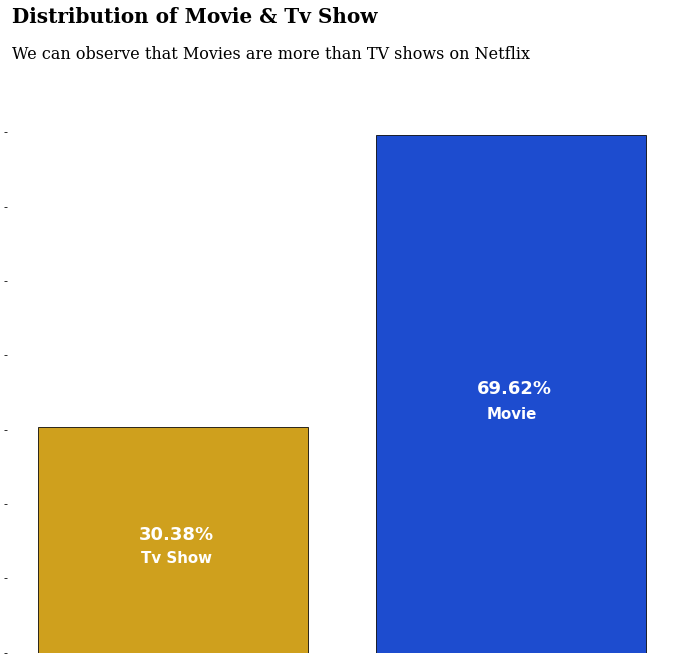

In [15]:
# Subset data
x = (df["type"].value_counts(normalize=True)*100).round(2).sort_values()
# plot data
fig, ax = plt.subplots(figsize=(12, 10))
ax.bar(x.index, x, color =["#CFA01D", "#1d4ccf"], edgecolor='k', linewidth=0.8)
for i,v in enumerate(x):
    plt.text( i-0.1 ,v/2, f"{v}%", color="w", fontsize=18, fontweight="bold")
   
fig.text(0.68, 0.45, "Movie", color="w", fontsize=15, fontweight="bold")
fig.text(0.28, 0.25, "Tv Show", color="w", fontsize=15, fontweight="bold")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tick_params(left="False", labelleft=False)     
fig.text(0.13, 1, "Distribution of Movie & Tv Show", fontfamily="serif", fontsize=20, fontweight="bold")
fig.text(0.13, 0.95, "We can observe that Movies are more than TV shows on Netflix", fontsize=16, fontfamily="serif")
for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_visible(False);


### -Movie Directors

The number of movies directed by each director is evaluated and the top ten directors are visualised.

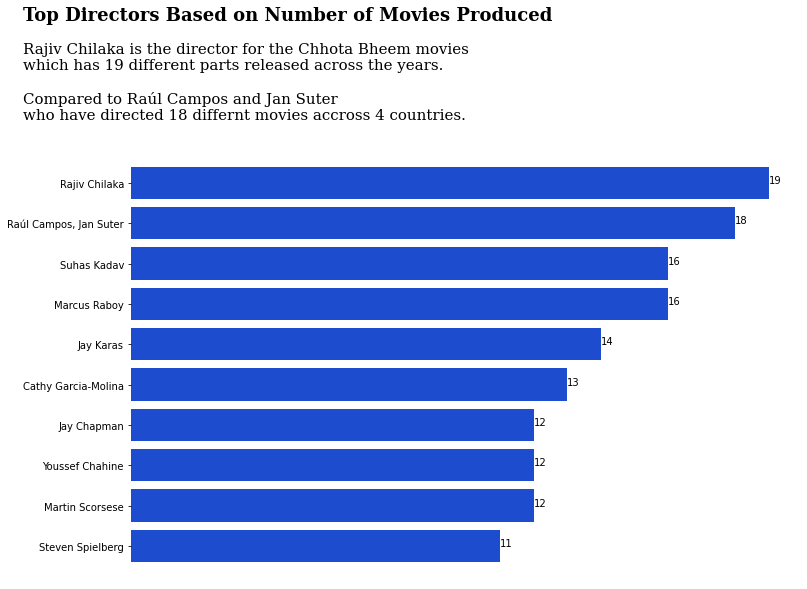

In [16]:
# Subset data
x = df["director"].value_counts()[:10].sort_values()
# Plot data
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(x.index, x, color="#1d4ccf")
for i, v in enumerate(x):
    plt.text(v, i, str(v), color="k")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)  
for s in ("top", "bottom", "left", "right"):
    ax.spines[s].set_visible(False)     
fig.text(0, 1.1, "Top Directors Based on Number of Movies Produced", fontsize=18, fontweight="bold", fontfamily="serif")
fig.text(0, 0.9, 
"""
Rajiv Chilaka is the director for the Chhota Bheem movies
which has 19 different parts released across the years.

Compared to Raúl Campos and Jan Suter 
who have directed 18 differnt movies accross 4 countries.
""", fontsize=15, fontfamily="serif");    


In [17]:
df.loc[df["director"] == "Raúl Campos, Jan Suter"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
show_id,,,,,,,,,,,,,
s4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,2018-07-27,2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good...",2018.0,July
s4782,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,2018-07-06,2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...,2018.0,July
s4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,2018-06-29,2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...,2018.0,June
s4850,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,2018-05-25,2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...,2018.0,May
s4867,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,2018-05-11,2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...,2018.0,May
s4941,Movie,Todo lo que sería Lucas Lauriente,"Raúl Campos, Jan Suter",Lucas Lauriente,Argentina,2018-04-06,2018,TV-MA,78 min,Stand-Up Comedy,"In his stand-up set, Argentine comic Lucas Lau...",2018.0,April
s4963,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,2018-03-30,2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...,2018.0,March
s5002,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,2018-03-02,2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...,2018.0,March
s5003,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,2018-03-02,2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...,2018.0,March


### -Movie Actors

Looking into the 'cast' column

In [134]:
df["cast"].head()

show_id
s1                                              No data
s2    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
s3    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
s4                                              No data
s5    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
Name: cast, dtype: object

The 'cast' column contains the list of actors for the movie.

The names in each is splitted and the total number of movies each actor acted in is evaluated

The top recurring actors are visualised

In [18]:
# Subset data
df_cast = df["cast"].str.split(",", expand=True)

num = len(pd.concat([df_cast[column].value_counts() for column in df_cast], axis = 1))
print(f"There are {num} different actors in this dataset.")

There are 39297 different actors in this dataset.


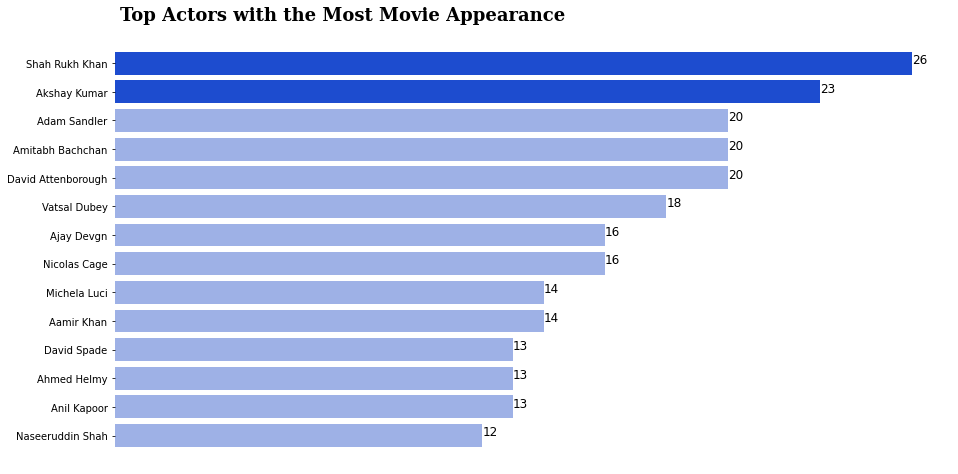

In [19]:
# Rearrange dataframe and apply 'series.value_counts' on every column in dataframe to ensure proper counting of actor names
x = pd.concat([df_cast[column].value_counts() for column in df_cast], axis = 1)[1:15][0].sort_values()

# Plot data
fig, ax = plt.subplots(figsize=(15,8))
color_map = ["#9eb1e6" for i in range(15)]
color_map[13] = color_map[12] = "#1d4ccf" # color highlight
ax.barh(x.index, x, color=color_map)
for i, v in enumerate(x):
    plt.text(v, i , str(round(v)), fontsize=12)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)   
for s in ("top", "bottom", "left", "right"):
    ax.spines[s].set_visible(False)   
fig.text(0.13, 0.9, "Top Actors with the Most Movie Appearance", fontsize=18, fontfamily="serif", fontweight="bold");

### -Top Countries

The 'country' column is analysed

In [20]:
df["country"].nunique()

748

There are less than 200 countries in the world.   

The column is further explored and it is noticed that some observations have more than one country listed.   

The values are splitted and the total number of countries is re-evaluated.

In [21]:
df["country"].tail(10)

show_id
s8798    United States, France, South Korea, Indonesia
s8799                                            India
s8800                                            India
s8801                                         Pakistan
s8802                     United Arab Emirates, Jordan
s8803                                    United States
s8804                                              NaN
s8805                                    United States
s8806                                    United States
s8807                                            India
Name: country, dtype: object

In [22]:
# Split 'country' on ',' and expand to create a dataframe of the splitted values
country = df["country"].str.split(",", expand=True)


In [23]:
# Count the frequency of unique countries
country_count= pd.concat([country[column].value_counts() for column in country], axis = 1)
country_count

,0,1,2,3,4,5,6,7,8,9,10,11
United States,3211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,1039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Japan,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Kuwait,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahamas,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethiopia,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Get total number of different countries
num_country = len(country_count)
print(f"The movies from this dataset are from {num_country} different countries")

The movies from this dataset are from 197 different countries


For analysis, only the first country in each observation is used

In [25]:
df["first_country"] = country[0]

# Reducing name lenght
df["first_country"].replace("United States", "USA", inplace=True)
df["first_country"].replace("United Kingdom", "UK", inplace=True)
df["first_country"].replace("South Korea", "S. Korea", inplace=True)


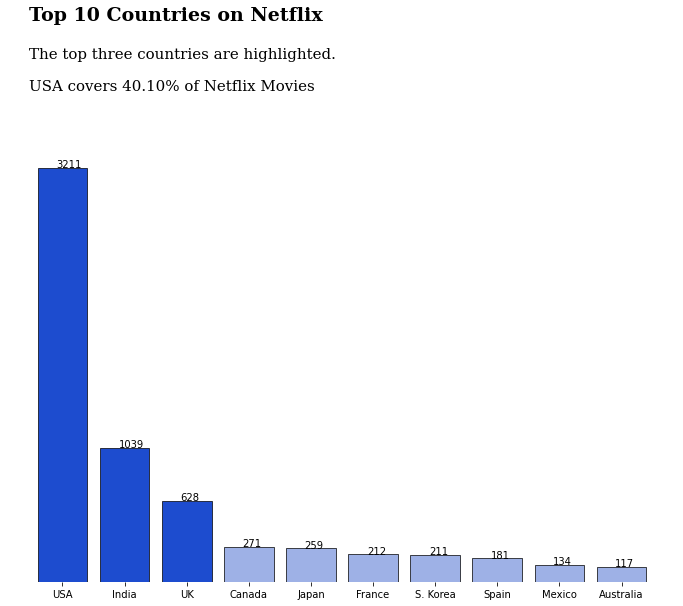

In [26]:
data = df["first_country"].value_counts().head(10)
fig, ax = plt.subplots(figsize=(12,8))
color_map = ["#9eb1e6" for i in range(10)]
color_map[0] = color_map[1] = color_map[2] =  "#1d4ccf" # color highlight
# Plot data
ax.bar(data.index, data, color=color_map, edgecolor='k', linewidth=0.7)
for i, v in enumerate(data):
    plt.text(i-0.1, v+5, str(v))
fig.text(0.15, 1.1,"Top 10 Countries on Netflix", fontsize=19, fontweight="bold", fontfamily="serif")   
fig.text(0.15, 0.95,"""
The top three countries are highlighted.

USA covers 40.10% of Netflix Movies
""", fontsize=15, fontfamily="serif")
plt.tick_params(left=False, labelleft=False)
for s in ("top", "right", "left", "bottom"):
    ax.spines[s].set_visible(False);

### Contents per Country

In [27]:
country_order = df['first_country'].value_counts()[:10].index
data_var = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_var


type,Movie,TV Show
USA,2364.0,847.0
India,958.0,81.0
UK,382.0,246.0
Canada,187.0,84.0
Japan,85.0,174.0
France,148.0,64.0
S. Korea,47.0,164.0
Spain,129.0,52.0
Mexico,86.0,48.0
Australia,61.0,56.0


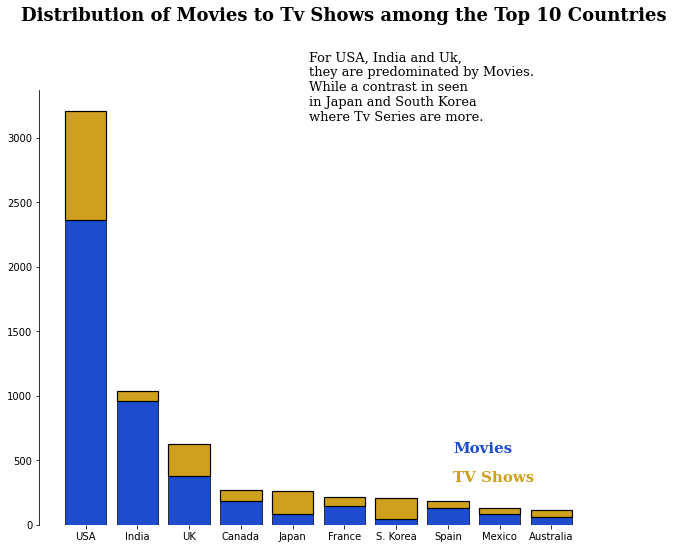

In [34]:
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(data_var.index, data_var["Movie"], color="#1d4ccf", edgecolor='k', linewidth=0.7)
ax.bar(data_var.index, data_var["TV Show"], bottom=data_var["Movie"], color="#CFA01D", edgecolor='k', linewidth=1.2)

for s in ("top", "right", "bottom"):
    ax.spines[s].set_visible(False)
fig.text(0.1, 1, "Distribution of Movies to Tv Shows among the Top 10 Countries", fontsize=18, fontweight="semibold", fontfamily="serif")
fig.text(0.5, 0.8, """
For USA, India and Uk, 
they are predominated by Movies.
While a contrast in seen 
in Japan and South Korea 
where Tv Series are more.
""", fontsize=13, fontweight="light", fontfamily="serif")
fig.text(0.7, 0.25, "Movies", fontsize=15, fontweight="bold", fontfamily="serif", color="#1d4ccf")
fig.text(0.7, 0.2, "TV Shows", fontsize=15, fontweight="bold", fontfamily="serif", color="#CFA01D");    

### How has content been added over the years?

In [29]:
df["type"].value_counts().index

Index(['Movie', 'TV Show'], dtype='object')

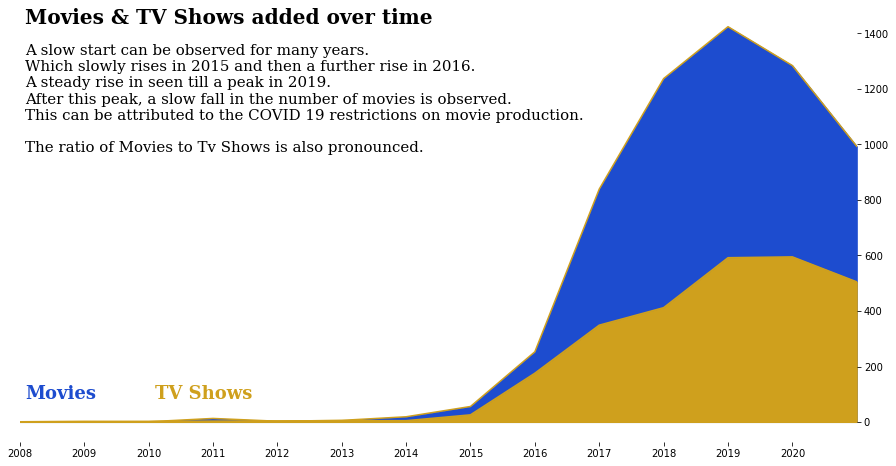

In [35]:
fig, ax = plt.subplots(figsize=(15,8))
color =["#1d4ccf", "#CFA01D"]
for i, m in enumerate(df["type"].value_counts().index):
    m_year = df[df["type"] == m]["year_added"].value_counts().sort_index()
    ax.plot(m_year.index, m_year, color=color[1], label=m)
    ax.fill_between(m_year.index, 0, m_year, color=color[i])
ax.yaxis.tick_right()
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.axhline(y=-0, color="#CFA01D", linewidth=1.5)
ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2021, 1))
fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.6, 
"""
A slow start can be observed for many years.
Which slowly rises in 2015 and then a further rise in 2016.
A steady rise in seen till a peak in 2019.
After this peak, a slow fall in the number of movies is observed. 
This can be attributed to the COVID 19 restrictions on movie production.

The ratio of Movies to Tv Shows is also pronounced.
""", fontsize=15, fontfamily="serif")
fig.text(0.13, 0.2, "Movies", fontsize=18, fontweight="bold", fontfamily="serif", color="#1d4ccf")
fig.text(0.25, 0.2, "TV Shows", fontsize=18, fontweight="bold", fontfamily="serif", color="#CFA01D");

### Looking into the cummulative sum of contents addition

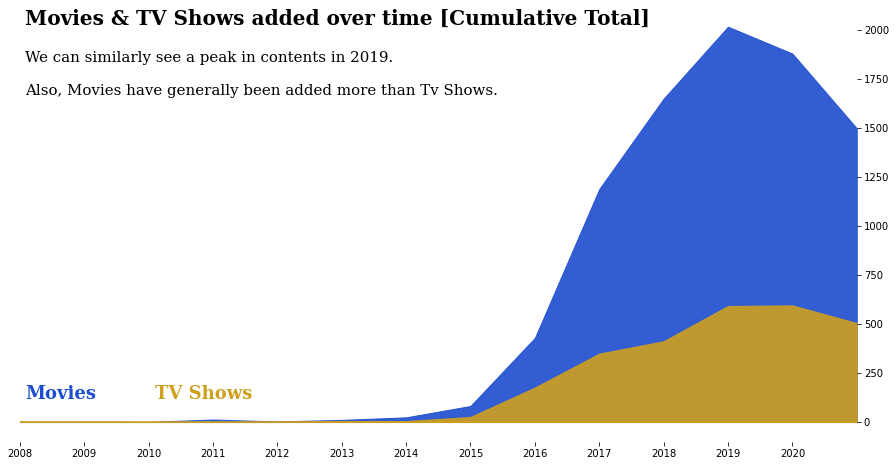

In [36]:
data_cum = df.groupby("type")["year_added"].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
fig, ax = plt.subplots(figsize=(15,8))
color =["#1d4ccf", "#CFA01D"]

for i, m in enumerate(df['type'].value_counts().index):
    m_rel = data_cum[m]
    ax.fill_between(m_rel.index, 0, m_rel, color=color[i], label=m,alpha=0.9)
ax.yaxis.tick_right()
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.axhline(y=-0, color="#CFA01D", linewidth=1.5)
ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2021, 1))
fig.text(0.13, 0.85, "Movies & TV Shows added over time [Cumulative Total]", fontsize=20, fontfamily="serif", fontweight="semibold")
fig.text(0.13, 0.7, """
We can similarly see a peak in contents in 2019.

Also, Movies have generally been added more than Tv Shows.
""", fontsize=15, fontfamily="serif")
fig.text(0.13, 0.2, "Movies", fontsize=18, fontweight="bold", fontfamily="serif", color="#1d4ccf")
fig.text(0.25, 0.2, "TV Shows", fontsize=18, fontweight="bold", fontfamily="serif",color="#CFA01D");  

### Month by Month

We have looked at contents over the years. Next up, months!  

Are there months where more movies are released?   

What are the trends quarterly?

In [37]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)

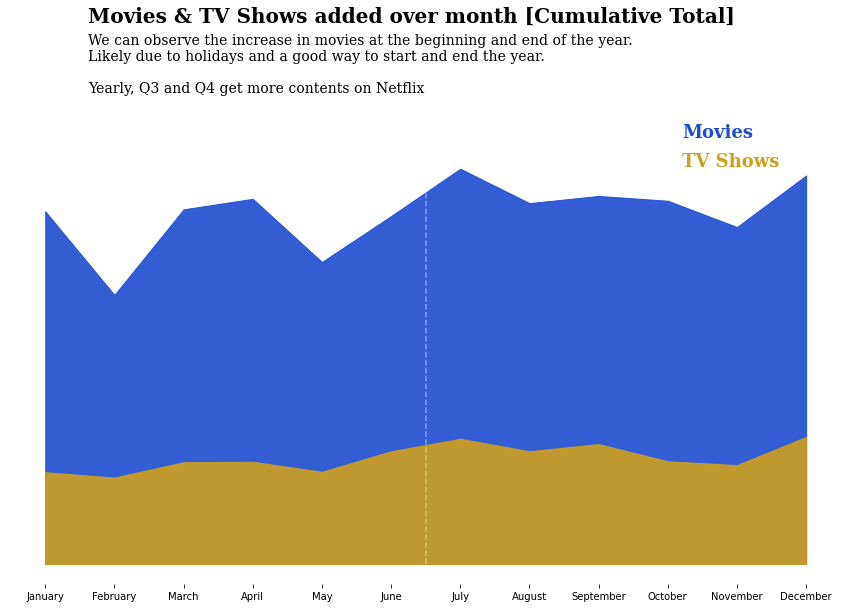

In [166]:
data_mon = df.groupby("type")["month_added"].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(figsize=(15,8))
color =["#1d4ccf", "#CFA01D"]

for i, m in enumerate(df['type'].value_counts().index):
    m_rel = data_mon[m]
    ax.fill_between(m_rel.index, 0, m_rel, color=color[i], label=m, alpha=0.9)
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
plt.tick_params(left=False, labelleft=False)
plt.vlines(5.5, ymin=0, ymax=800, linestyle="dashed",color="w", alpha=0.4)
fig.text(0.2, 1.1, "Movies & TV Shows added over month [Cumulative Total]", fontsize=20, fontfamily="serif", fontweight="semibold")
fig.text(0.2, 0.93, """
We can observe the increase in movies at the beginning and end of the year.
Likely due to holidays and a good way to start and end the year.

Yearly, Q3 and Q4 get more contents on Netflix
""", fontsize=14, fontfamily="serif")

fig.text(0.75, 0.9, "Movies", fontsize=18, fontweight="bold", fontfamily="serif", color="#1d4ccf")
fig.text(0.75, 0.85, "TV Shows", fontsize=18, fontweight="bold", fontfamily="serif",color="#CFA01D" );

#### Movie Release Year

In [151]:
df["release_year"].value_counts().sort_index().head(1)

1925    1
Name: release_year, dtype: int64

In [152]:
df[df["release_year"] == 1925]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,first_country
show_id,,,,,,,,,,,,,,
s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,No data,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,2018.0,December,NaN


The year or release of the movies was inspected and it showed that the earliest movie was released way back in 1925!  

The one-season Tv Show is titled "Pioneers: First Women Filmmakers" and it was added to Netflix December 30, 2018  

#### Comparing release year to year added into Netflix

In [153]:
x_year = df["release_year"].value_counts().sort_index()
y_add = df["year_added"].value_counts().sort_index()

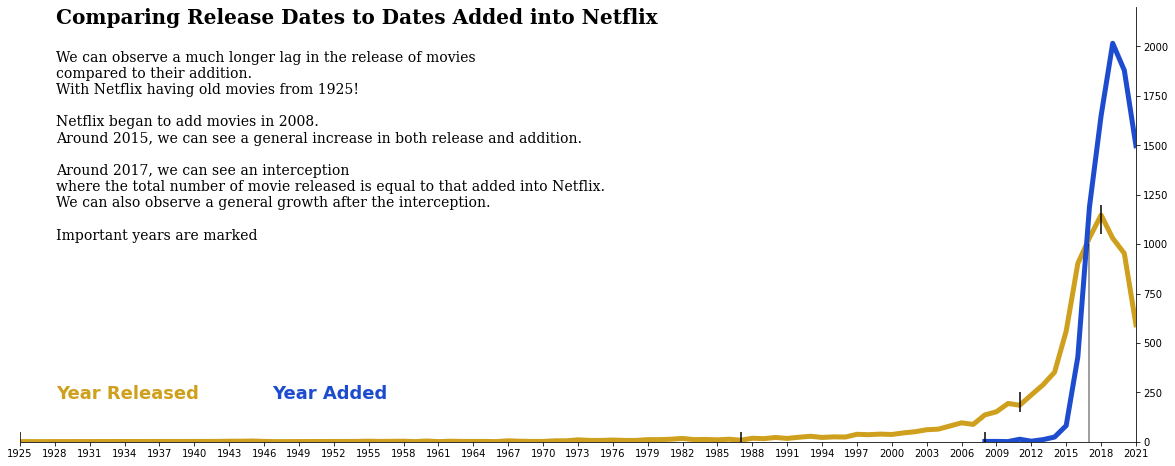

In [169]:
fig, ax = plt.subplots(figsize=(20,8))   # ["#1d4ccf", "#78A1BB"]


ax.plot(x_year, color="#CFA01D", label="Release Year", linewidth=5) #label="selected points")
ax.plot(y_add, color="#1d4ccf", label="Date Added", linewidth=5)
plt.xticks(np.arange(1925, 2022, 3))

plt.vlines(1987, ymin=0, ymax=50, color="k")
plt.vlines(1925, ymin=0, ymax=50, color="k")
plt.vlines(2008, ymin=0, ymax=50, color="k")
plt.vlines(2011, ymin=150, ymax=250, color="k")
plt.vlines(2018, ymin=1050, ymax=1200, color="k")

plt.vlines(2017, ymin=0, ymax=1000, color="k", alpha=0.5)
ax.yaxis.tick_right()
plt.ylim(0, 2200)

plt.xlim(1925, 2021)
for s in ['top', 'left']:
    ax.spines[s].set_visible(False)

fig.text(0.15, 0.85, "Comparing Release Dates to Dates Added into Netflix", fontsize=20, fontfamily="serif", fontweight="semibold")
fig.text(0.15, 0.42, """
We can observe a much longer lag in the release of movies
compared to their addition.
With Netflix having old movies from 1925!

Netflix began to add movies in 2008.
Around 2015, we can see a general increase in both release and addition. 

Around 2017, we can see an interception
where the total number of movie released is equal to that added into Netflix.
We can also observe a general growth after the interception.

Important years are marked

""", fontsize=14, fontfamily="serif")
fig.text(0.3, 0.2, "Year Added", fontsize=18, fontweight="bold", fontfamily="Helvetica", color="#1d4ccf")
fig.text(0.15, 0.2, "Year Released", fontsize=18, fontweight="bold", fontfamily="Helvetica", color="#CFA01D");

### -Movie Durations

The duration of every movie differs, some are seasonal while others are not. The ten most occuring duration is evaluated and visualised 

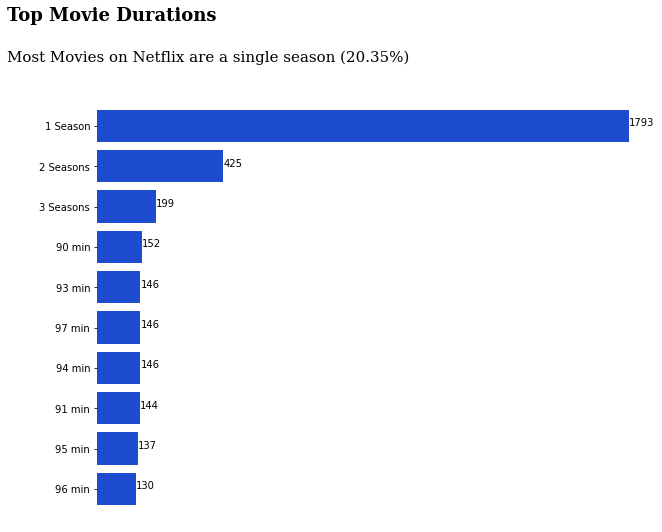

In [155]:
# Subset data
x = df["duration"].value_counts()[:10].sort_values()
# Plot data
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(x.index, x, color="#1d4ccf")
for i, v in enumerate(x):
    plt.text(v, i, str(v), color="k")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
for s in ['top', 'right', "left", "bottom"]:
    ax.spines[s].set_visible(False)
fig.text(0, 1,"Top Movie Durations", fontsize=18, fontweight="bold", fontfamily="serif")
fig.text(0, 0.93, "Most Movies on Netflix are a single season (20.35%)", fontsize=15, fontfamily="serif");

#### What are the longest seasons in Netflix?

In [156]:
df.loc[df["duration"].str.contains("Seasons")]["duration"].str.replace("Seasons", " ").astype("int").sort_values(ascending=False).head(40).value_counts()

8     14
9      9
10     7
13     3
15     2
12     2
11     2
17     1
Name: duration, dtype: int64

In [157]:
df.loc[df["duration"] == "17 Seasons"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,first_country
show_id,,,,,,,,,,,,,,
s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2021.0,July,USA


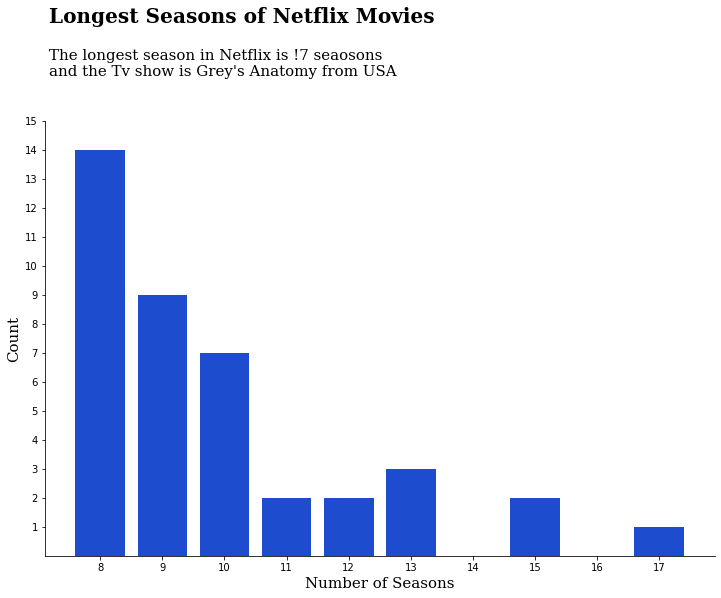

In [158]:
data_s = df.loc[df["duration"].str.contains("Seasons")]["duration"].str.replace("Seasons", " ").astype("int").sort_values(ascending=False).head(40).value_counts()


fig, ax = plt.subplots(figsize=(12,8))
#color_map = ["#c4837c" for i in range(10)]
#color_map[0] = color_map[1] = color_map[2] =  "#831010" # color highlight
ax.bar(data_s.index, data_s.values, color="#1d4ccf")
ax.set_xticks(np.arange(8, 18, 1))
ax.set_yticks(np.arange(1, 16, 1))
ax.set_xlabel("Number of Seasons", fontfamily="serif", fontsize=15)
ax.set_ylabel("Count", fontfamily="serif", fontsize=15)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.text(0.13, 1.05, "Longest Seasons of Netflix Movies", fontsize=20, fontfamily="serif", fontweight="bold")
fig.text(0.13, 0.93, """
The longest season in Netflix is !7 seaosons 
and the Tv show is Grey's Anatomy from USA
""", fontsize=15, fontfamily="serif");

In [159]:
df.loc[df["duration"] == "312 min"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,first_country
show_id,,,,,,,,,,,,,,
s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018.0,December,USA


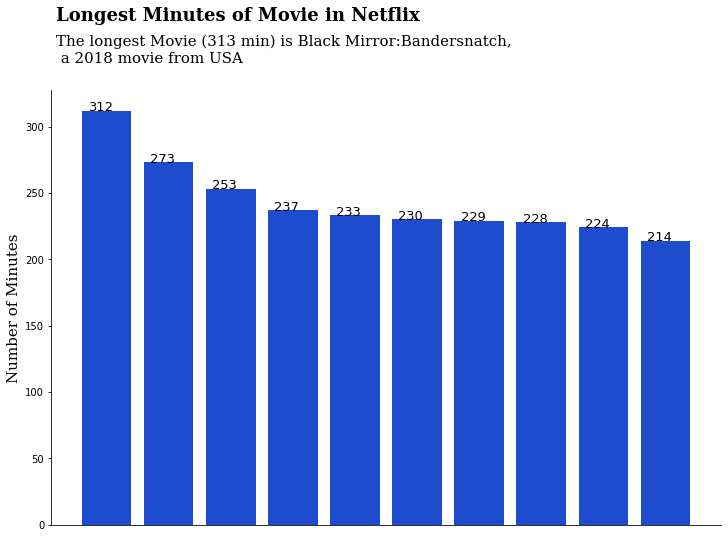

In [160]:
data_min = df.loc[df["duration"].str.contains("min")]["duration"].str.replace("min", " ").astype("int").sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(range(10), data_min, color="#1d4ccf")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
ax.set_ylabel("Number of Minutes", fontsize=15, fontfamily="serif")
for i, v in enumerate(data_min):
    plt.text(i-0.3, v, str(v), fontsize=13)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.text(0.13, 1, "Longest Minutes of Movie in Netflix", fontsize=18, fontfamily="serif", fontweight="bold")
fig.text(0.13, 0.9, """
The longest Movie (313 min) is Black Mirror:Bandersnatch,
 a 2018 movie from USA
 """, fontsize=15, fontfamily="serif");

In [161]:
df.loc[df["duration"] == "3 min"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,first_country
show_id,,,,,,,,,,,,,,
s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No data,United States,2019-06-04,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019.0,June,USA


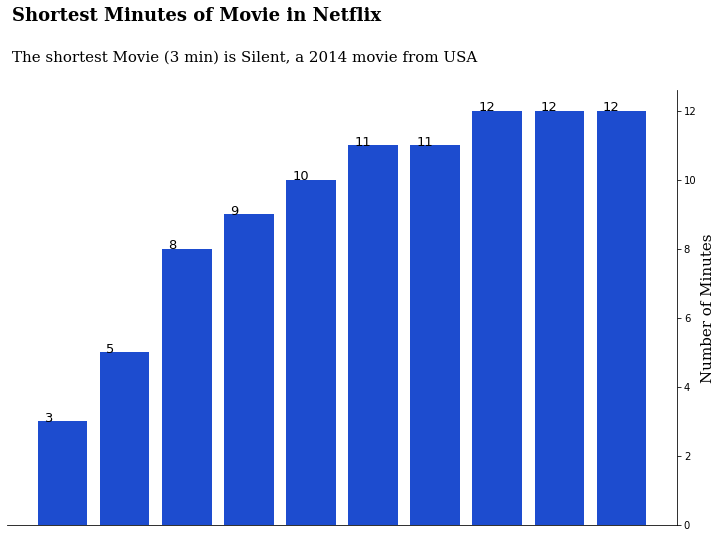

In [162]:
data_low = df.loc[df["duration"].str.contains("min")]["duration"].str.replace("min", " ").astype("int").sort_values(ascending=False).tail(10).sort_values()
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(range(10), data_low, color="#1d4ccf")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel("Number of Minutes", fontsize=15, fontfamily="serif")
for i, v in enumerate(data_low):
    plt.text(i-0.3, v, str(v), fontsize=13)
for s in ['top', 'left']:
    ax.spines[s].set_visible(False)
fig.text(0.13, 1, "Shortest Minutes of Movie in Netflix", fontsize=18, fontfamily="serif", fontweight="bold")
fig.text(0.13, 0.93, "The shortest Movie (3 min) is Silent, a 2014 movie from USA", fontsize=15, fontfamily="serif");

### Movie Rating

#### Frequency of Rating Types

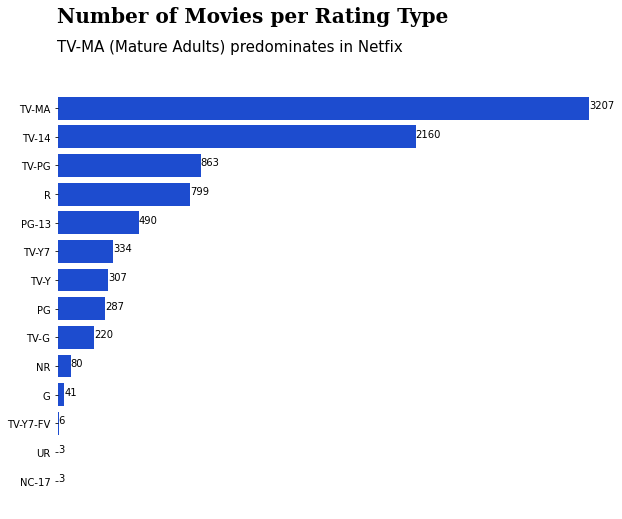

In [163]:
# Subset and Plot data
x = df["rating"].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(x.index, x, color="#1d4ccf")
for i, v in enumerate(x):
    plt.text(v, i, str(v))
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)    
plt.text(-5, 16,"Number of Movies per Rating Type", fontsize=20, fontweight="bold", fontfamily="serif")
plt.text(-5, 15, "TV-MA (Mature Adults) predominates in Netfix", fontsize=15)
for s in ("top", "bottom", "right", "left"):
    ax.spines[s].set_visible(False);

#### Distribution of Rating Types between Movies and TV Shows

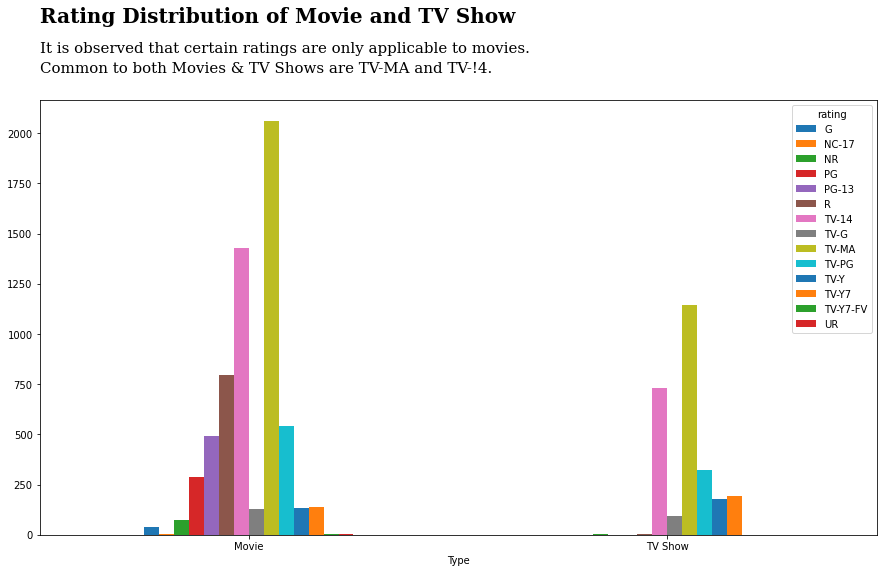

In [164]:
df.groupby("type")["rating"].value_counts().unstack().fillna(0).plot(kind="bar", figsize=(15,8))
plt.xticks(rotation=0)
plt.xlabel("Type")
plt.text(-0.5, 2550, "Rating Distribution of Movie and TV Show", fontsize=20, fontfamily="serif", fontweight="bold")
plt.text(-0.5, 2400, "It is observed that certain ratings are only applicable to movies.", fontsize=15, fontfamily="serif")
plt.text(-0.5, 2300, "Common to both Movies & TV Shows are TV-MA and TV-!4.", fontsize=15, fontfamily="serif");

### -Movie Listings

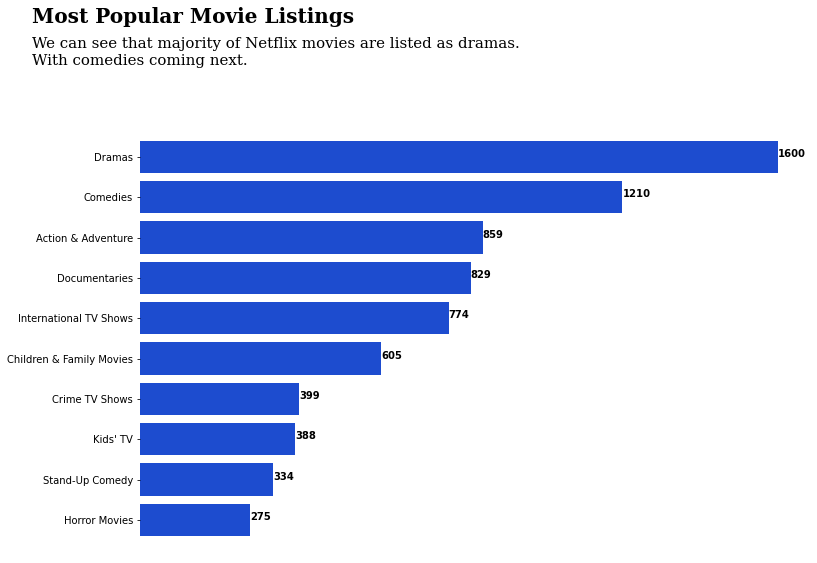

In [165]:
# Subset data
df_list = df["listed_in"].str.split(",", expand=True)
x =  pd.concat([df_list[column].value_counts() for column in df_list], axis = 1).head(10)[0].sort_values(ascending=False).sort_values()
# Plot data
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x.index, x, color="#1d4ccf")
for i, v in enumerate(x):
    plt.text(v, i, str(round(v)), fontweight="bold")
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)    
for s in ("top", "bottom", "right", "left"):
    ax.spines[s].set_visible(False)
fig.text(0, 0.95, """
We can see that majority of Netflix movies are listed as dramas.
With comedies coming next.
""", fontsize=15, fontfamily="serif")
fig.text(0, 1.05, "Most Popular Movie Listings", fontsize=20, fontweight="semibold", fontfamily="serif");